
## What we're trying to do

In almost every course you take throughout this program, you'll encounter optimization. Trying to find the variables that best maximize or minimize a particular problem will appear in many forms. Sometimes you'll want to figure out what price a firm should charge to maximize profits or what coefficients in a statistical model minimize prediction error. Often times the solution to the problem will be very difficult to see initially and maybe even too complicated to compute for all possible values. But before we start diving into complex problems, let's examine a simple example to illustrate these ideas.

## For local analysis

If you prefer to develop your code in a Jupyter notebook, you can download <a href="cases/mini_case_1.ipynb">mini_case_1.ipynb</a>. This notebook file has the same text and code chunks that you see on this webpage. After creating the required code, copy-and-paste it into the code-inputs on this webpage for testing.

## A simple starting point

Suppose we want to find the value of $x$ that minimizes the following function: $f(x) = x^2$ where $x \in \mathbb{R}$.


In [57]:
# Question 1.01: For your first task, define a Python function that accepts a
# vector of numbers and returns that vector of numbers squared. Call this
# function `square`.

import numpy as np

def square(x):
    if isinstance(x, (int, float, np.ndarray)):
        return x**2
    elif isinstance(x, (list, tuple)):
        return [i**2 for i in x]
    else:
        return 'Invalid input'
   

square(4)  # should print 16
square(np.array([1, 2, 3]))  # should print [1, 4, 9]

array([1, 4, 9])

Next, let's visualize the function that we're analyzing in this exercise using matplotlib in Python.


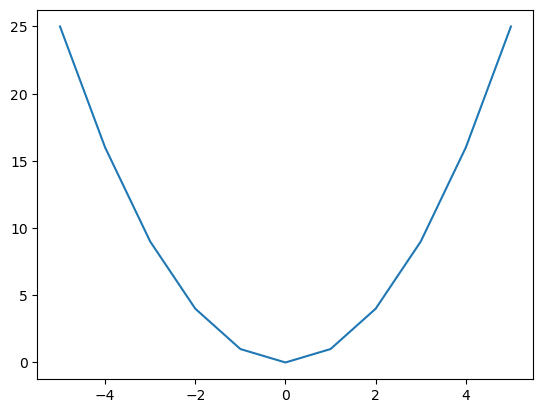

In [55]:
# Question 1.02: First, create a numpy vector called `x_grid` containing the
# numbers from -5 to 5 in increments of 1. Then use your `square` function to
# create a numpy vector called `y_values` that contains the squared values of
# `x_grid`. Then plot the `y_values` over the range of `x_grid` as a line
# graph.

x_grid = np.arange(-5, 6, 1)   # Replace with your code
y_values = x_grid**2    # Replace with your code


# optional: Create a line plot of the y_values
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(x_grid, y_values)


# show plot
plt.show()

In [ ]:
# Question 1.03: What value of $x$ minimizes the function you created for question 1.02?

While it's clear to see what value of $x$ minimizes the function, many problems we'll tackle in the future do not have such a clear answer. In these cases, we'll approximate a solution to the problem using Python (or R) code. Let's explore some possible techniques using the `square` function as our example.

## Grid search

One way to tackle the problem of approximating the minimum value of a function would be to input multiple values into your function and see which one returns the smallest answer. This approach is called "grid search." Grid search commonly appears in the context of finding the best "hyperparameters" to use when applying a machine learning model to your data. Hyperparameters refer to certain values, or settings, a data scientist must choose when estimating a model to ensure a good fit to the data. For example, when using a [random forest classifier](https://parsnip.tidymodels.org/reference/rand_forest.html), the analyst must decide the number of trees to create.

In order to find the optimal value using grid search, our task consists of three steps.

1. Create a grid of possible values.
2. Compute the objective function for each value of the grid.
3. Find out which value from the grid best achieves our objective.

Let's try this approach with our illustrative example.


In [88]:
# Question 1.04: Create a vector called `x_grid` containing numbers ranging
# from -5 to 5 in increments of 0.1. Create another vector called `y_values`
# that consists of the square (i.e., $f(x) = x^2$) of each number in `x_grid`.
# Use your previously created function called `square`.

x_grid = np.arange(-5, 5.1, 0.1)    # Replace with your code
y_values = square(x_grid) # Replace with your code

[x_grid.min().round(3), x_grid.max().round(3)]  # should show [-5.0, 5.0]
[y_values.min().round(3), y_values.max().round(3)]  # should show [0.0, 25.0]

x_grid.min()

-5.0

In [89]:
# Question 1.05: Create a function called `find_min` that returns a value from
# `x_grid` corresponding to the minimum value of `y_values`. Your function
# should accept two arguments, `x_vec` and `y_vec`. If there are multiple
# values in `x_vec` that correspond to the minimum value of `y_values`, your
# function should return the lowest of those values from `x_vec`. Note: Your
# function should use `for` and `if` statements, `len` and `range` but no other
# functions from Python or Numpy.

# Create a function called `find_min` that returns a value
# from `x_grid` corresponding to the minimum value of
# `y_values`


def find_min(x_vec, y_vec):
    miny = float('inf')
    ind_list = []
    for i in range(len(y_vec)):
        if y_vec[i] <= miny:
            miny = y_vec[i]
    for i in range(len(y_vec)):
        if y_vec[i] == miny:
            ind_list.append(i)
    x_list = [x_vec[i] for i in ind_list]
    minx = float('inf')
    for i in range(len(x_list)):
        if x_list[i] <= minx:
            minx = x_list[i]
    return minx


find_min(np.array([4, 8, 3]), np.array([-999, 0, 0]))  # should return 4
find_min(np.array([4, 8, 3]), np.array([0, -999, -999]))  # should return 3
find_min(x_grid, y_values).round(3)  # should return the value from question 1.03

print(10*12*9*11*8)

95040


## Random search

In grid search we create an evenly spaced set of numbers and evaluated each one. If your function takes multiple inputs and takes a long time to compute, as is common in machine learning, the grid search approach could be prohibitively slow!

For example, suppose you had a model with five hyperparameters. Imagine you wanted to try 10 different values for the first parameter, 12 different values for the second parameter, 9 values for the third parameter, 11 values for the fourth parameter, and 8 values for the fifth parameter. Evaluating the model for all possible combinations of the parameter values would take a long time!


In [ ]:
# Question 1.06: How many different combinations of hyper parameters would you need to evaluate in the example mentioned above?

Random search is similar to grid search but with a simple twist. Instead of constructing an evenly-spaced grid of numbers, we randomly select numbers from a range of possible values. Let's try this approach.

First, set a seed for your random number generator for reproducibility. This makes it so that others can reproduce the same sequence of random values when they evaluate your work. Set the seed to be 1234.


In [114]:
# Question 1.07: Create a vector called `x_rgrid` consisting of 100 values
# drawn from a uniform distribution with a domain of -5 to 5, that is
# $\mathcal{U}(-5, 5)$. Then, compute another vector called `y_rvalues` that
# consists of the square (i.e., $f(x) = x^2$) of each number in `x_rgrid`.
# Finally, use your function `find_min` to find the value in `x_rgrid` that
# corresponds to the minimum value in `y_rvalues`. Store this value in a
# variable called `xmin_rgrid`.

from datetime import datetime as dt
np.random.seed(1234)

x_rgrid = np.random.uniform(-5, 5, 100)   # Replace with your code
y_rvalues = square(x_rgrid)  # Replace with your code

start = dt.now()
xmin_rgrid = find_min(x_rgrid, y_rvalues)
(dt.now() - start).microseconds

xmin_rgrid

0.009951255234587286

Theoretically, there are an infinite number of possible values of `x_grid` to evaluate in this example. Even in this simple case our `square` function would take, literally, forever to run. By sampling 100 values between -5 to 5 we reduce the computation to mere milliseconds and still get a good approximation of the true minimum.

## Gradient descent

In both grid search and random search, we evaluated each point independently. In other words, after each calculation we did not learn anything about whether we are any closer to the best solution. What if we could choose the next point to evaluate in a smart way based on what we learned from the last calculation? A very popular way to inform the choice of the next point we try in our search is called gradient descent. In this section, we'll program a simple gradient descent algorithm.

<!-- Gradient descent utilizes the slope (univariate) or gradient (multivariate) of the objective function. Consider the simple example of $f(x) = x^2$.  -->


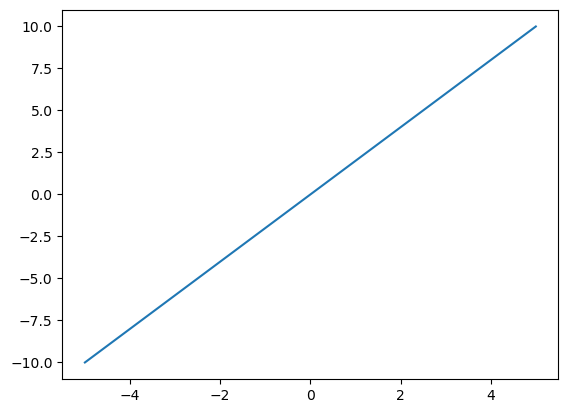

In [135]:
# Question 1.08: Create a function called, `calc_slope`, which returns the
# slope of the `square` function at a given value. Optional: Use seaborn to
# plot the value of the slope over the range of -5 to 5 with increments of 0.1.

def calc_slope(x):
    if isinstance(x, (int, float, np.ndarray)):
        return 2 * x
    elif isinstance(x, (list, tuple)):
        return [2 * i for i in x]
    else:
        return 'Invalid input'

x_grid = np.arange(-5, 5.1, 0.1) 
dy = calc_slope(x_grid)

# optional: Create a line plot of the slope of x_square
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(x_grid, dy)

# show plot
plt.show()

Note that as we get closer to the minimum value of the function, the absolute value of the slope becomes smaller and smaller. Also, when the slope is negative, moving to the right takes us closer to the solution. On the other hand, when the slope is positive, moving to the left brings us closer. One way to guide our next step would be to use an expression like the following:

$$ x - \eta f'(x) $$

where $\eta$ represents the "learning rate." The learning rate is something the analyst has to determine, for example, using "cross-validation". A larger value for the learning rate can lead to faster convergence of an algorithm to the optimum value but can also lead to "overshooting". As a (crude) analogy, you can get to your destination more quickly if you drive very fast, but might also be more likely to miss your highway exit.

To summarize, in this algorithm, the slope tells us which direction and how big of a step to take towards the minimum while the learning rate moderates the magnitude of that step. We keep changing our best guess for the value of $x$ that will return the optimum value for $y$ by using feedback on the slope as we change the value of $x$. In order to check your understanding, answer the quiz questions below.


In [ ]:
# Question 1.09: What should our next guess be for the value $x$ if our current guess is 3 and we use a learning rate of 0.2?

In [ ]:
# Question 1.10: As we get closer to the solution do the increments between each guess get larger or smaller?

Now, let's try to implement a part of the gradient descent algorithm.


In [138]:
# Question 1.11: Create a function called, `next_guess`, which returns the next
# value of $x$ evaluated for a given value of $x$ and a learning rate. Your
# function should accept two parameters, `x` and `learning_rate`.

def next_guess(x, learning_rate):
    return x - learning_rate * calc_slope(x)


next_guess(-1, 0.1) # should return -0.8
next_guess(-5, 0.01) # should return -4.9
next_guess(1, 2) # should return -3

-3

Now let's work on creating our gradient descent function. Before we get started, let's review what we need to do.

1. Start with an initial guess for the value of $x$ (i.e., the minimum).
2. Compute the next point to guess using the function `next_guess`.
3. Compare the next point to the current point (or current guess).
   - If they are close enough to each other, then we accept the current point as the minimum.
   - If they are not close enough to each other, then use the function `next_guess` to calculate the next guess.
4. Keep repeating the previous step until either subsequent guesses are close enough to each other or you reach a maximum number of iterations.

This figure illustrates the algorithm at work. Note how the step size changes as we get closer to the minimum.

<div align="center"><img src="images/animation.gif"/></div>

In the following exercise, you'll implement the gradient descent algorithm. 


In [159]:
# Question 1.12: Create a function called `grad_desc` that accepts `max_iter`
# (short for maximum number of iterations), `tol` (short for tolerance), and an
# initial value (`x0`) as arguments. Your function should use a loop that
# iterates until the maximum number of iterations (`max_iter`) has been reached
# or the difference between subsequent values of $x$ falls below a certain
# threshold (i.e., `tol`). Suppose you have `x` (i.e., current guess) and
# `next_x` (i.e., next guess) as your variables. If the absolute difference
# between `x` and `next_x` is less than the tolerance, return `x`. Get the
# function to print (1) if the maximum number of iterations was reached without
# convergence or (2) at what number of iterations the algorithm did converge.
# The function should return the best guess $x$.

def grad_desc(x0, learning_rate = 0.1, max_iter = 100, tol = 0.01):
    for i in range(max_iter):
        next_x = next_guess(x0, learning_rate)
        if abs(x0 - next_x) < tol:
            if i == 0:
                print(f'This occurred after 1 iteration')
            else:
                print(f'This occurred after {i+1} iterations')
            return round(x0, 3)
        elif i == max_iter - 1:
            print('This occurred after 100 iterations')
            return round(next_x, 3)
        x0 = next_x


grad_desc(-5) # should return -0.046 and print this occurred after 22 iterations
grad_desc(-4, 0.99) # should return -0.53 and print this occurred after 100 iterations
grad_desc(0) # should return 0 and print this occurred after 1 iteration

This occurred after 22 iterations
This occurred after 100 iterations
This occurred after 1 iteration


0

In [ ]:
# Question 1.13: If you used Code Interpreter in ChatGPT+, please provide the link to the chat session you used here. You can find the link by clicking on the 'Share' button in the upper right corner of the ChatGPT+ window as shown in the screenshot below. If you used another AI-tool, please provide your prompt and the URL for the tool.

<div style="text-align:center;">
  <img src="images/ebike-trails.png" height="500px" />
</div>


In [ ]:
# Question 1.14: Please write a short reflection on what AI-tools were and were not useful for when you worked on this case. 3-4 lines of text should be sufficient.

## GitHub Extension for Case 1, Part B

Your next step is to complete an extension of the exercise above using Git and GitHub. Click on the link below that corresponds to your section and follow the instructions to complete the extension.

* FW MSBA: <a href="https://classroom.github.com/a/xgs4XAfw" target="_blank" rel="noopener noreferrer">https://classroom.github.com/a/xgs4XAfw</a>
* FT MSBA: <a href="https://classroom.github.com/a/voRQj2gr" target="_blank" rel="noopener noreferrer">https://classroom.github.com/a/voRQj2gr</a>

Once you accept the assignment, you will be able to access your repository through the provided link and also at <a href="https://github.com/rsm-msba-24-25" target="_blank" rel="noopener noreferrer">https://github.com/rsm-msba-24-25</a>.

After cloning the repo to the `~/git` directory on your computer, read the README.md file and follow the instructions. Once you push your submission to the server and the code passes all tests you will be ready to take on Case 2! Good luck!


